In [ ]:
!pip install wordninja
! pip install unidecode

In [ ]:
import pandas as pd
import numpy as np
import unidecode
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import warnings
import wordninja
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Analytics Vidya/sentimental_analysis/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Analytics Vidya/sentimental_analysis/test.csv')

In [ ]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Preporcessing

1. Drop ID Column
2. Do some data clearning:
> Lower case all character. \
> Remove tweeter handlers. \
> Remove URLS \
> Replace Unicode character \
> keep words with length > 1 \
> split words like whatisthis to what is this \
> remove repeated spaces \
> remove Puncations

In [ ]:
def clean_text(text):
  """Lower the all text"""
  text = text.lower()

  # Remove Tweeter handlers
  text = re.sub(r'@\S+','',text)

  #Remove URLS from tweets
  text = re.sub(r'http\S+','',text)
  text = re.sub(r'pic\S+','',text)

  #Replace unicode character
  text = unidecode.unidecode(text)

  #Remove numbers from the text
  text = re.sub(r"[^a-zA-Z+']",'',text)

  #split the words like 'whatisthis' to 'what is this'
  def preprocessing_wordninja(sentence):
    def splitwords(x):
      x = wordninja.split(x)
      x = [word for word in x if len(word) > 1]
      return x
    new_sentence = [' '.join(splitwords(word)) for word in sentence.split()]
    return ' '.join(new_sentence)

  text = preprocessing_wordninja(text)

  # regex removes repeated spaces, strip removes leading and trailing spaces
  text= re.sub("\s[\s]+", " ",text).strip()  
  
  return text

In [ ]:
## Preprocessing Text
train['tweet']=train['tweet'].apply(lambda x: clean_text(x))
test['tweet']=test['tweet'].apply(lambda x: clean_text(x))

In [ ]:
train.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally trans paran silicon case thanks to my ...
2,3,0,we love this would you go talk make memories u...
3,4,0,i'm wired know i'm george was made that way ip...
4,5,1,what amazing service apple won't even talk tom...


In [ ]:
test.head()

,id,tweet
0,7921,hate the new iphone upgrade won't let me downl...
1,7922,currently shitting my fucking pants apple imac...
2,7923,i'd like to puts some cd roms on my ipad is th...
3,7924,my ipod is officially dead lost all my and vid...
4,7925,been fighting itunes all night only want the m...


## Most Used Words

> We can check most used words by word cloud.

In [ ]:
positive_sentence = train[train['label'] == 0]
all_words = ' '.join([text for text in positive_sentence['tweet']])

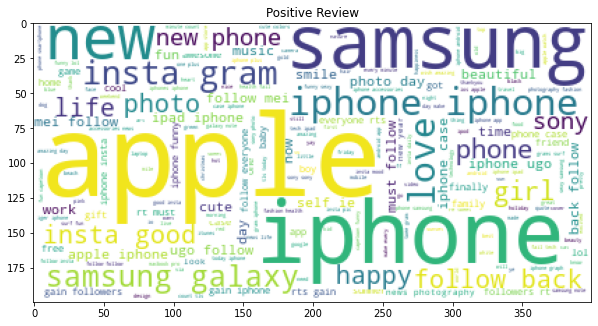

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(
    background_color='white').generate(all_words))
plt.title('Positive Review')
plt.savefig('Positive_comments.png')
plt.show()

In [ ]:
negative_sentence = train[train['label'] == 1]
all_words = ' '.join([text for text in negative_sentence['tweet']])

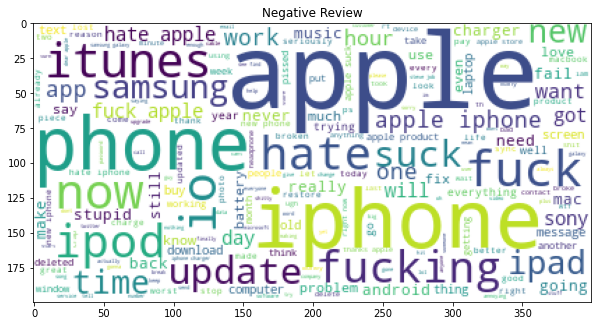

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(
    background_color='white').generate(all_words))
plt.title('Negative Review')
plt.savefig('Negative_comments.png')
plt.show()

## Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(train['tweet'],
                                                   train['label'],
                                                   random_state=42,
                                                   shuffle=True,
                                                   test_size=0.2)

In [ ]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((6336,), (6336,), (1584,), (1584,))

In [ ]:
# !pip install ktrain

In [ ]:
from ktrain import text
import ktrain

MAXLEN = 40
BATCH_SIZE = 8

LEARNING_RATE = 1e-5
EPOCHS = 20

t=text.Transformer('distilbert-base-uncased', maxlen=MAXLEN, class_names=[0,1])

X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_valid=X_valid.to_numpy()
y_valid=y_valid.to_numpy()

training = t.preprocess_train(X_train, y_train)
validation = t.preprocess_test(X_valid, y_valid)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=training, val_data=validation, batch_size=BATCH_SIZE)

preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 30
	99percentile : 39


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 17
	95percentile : 29
	99percentile : 40


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
792/792 [==============================] - 53s 57ms/step - loss: 0.6023 - accuracy: 0.7206
Epoch 2/10
792/792 [==============================] - 46s 57ms/step - loss: 0.3395 - accuracy: 0.8335
Epoch 3/10
792/792 [==============================] - 46s 57ms/step - loss: 0.2256 - accuracy: 0.9059
Epoch 4/10
792/792 [==============================] - 46s 57ms/step - loss: 0.2355 - accuracy: 0.9010
Epoch 5/10
792/792 [==============================] - 46s 57ms/step - loss: 0.4705 - accuracy: 0.7948
Epoch 6/10
792/792 [==============================] - 46s 56ms/step - loss: 0.5893 - accuracy: 0.7456
Epoch 7/10
792/792 [==============================] - 45s 56ms/step - loss: 0.5737 - accuracy: 0.7446
Epoch 8/10
792/792 [==============================] - 22s 26ms/step - loss: 8.7119 - accuracy: 0.7473


done.
Visually inspect loss plot and select learning rate associated with falling loss


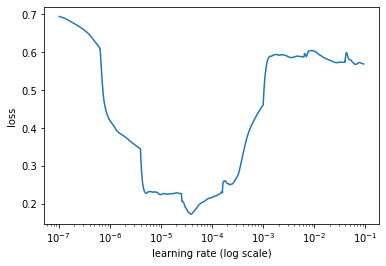

In [ ]:
learner.lr_find(show_plot=True, max_epochs=5)

## Reset Weight

In [ ]:
learner.reset_weights()

Model weights have been reset.


## Train the Model

In [ ]:
learner.fit_onecycle(lr=1e-5,epochs=5)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/5
792/792 [==============================] - 57s 62ms/step - loss: 0.3780 - accuracy: 0.8256 - val_loss: 0.2448 - val_accuracy: 0.8946
Epoch 2/5
792/792 [==============================] - 49s 60ms/step - loss: 0.2157 - accuracy: 0.9121 - val_loss: 0.2208 - val_accuracy: 0.9085
Epoch 3/5
792/792 [==============================] - 49s 60ms/step - loss: 0.1698 - accuracy: 0.9334 - val_loss: 0.2421 - val_accuracy: 0.9003
Epoch 4/5
792/792 [==============================] - 49s 60ms/step - loss: 0.1176 - accuracy: 0.9580 - val_loss: 0.2581 - val_accuracy: 0.9003
Epoch 5/5
792/792 [==============================] - 49s 60ms/step - loss: 0.0831 - accuracy: 0.9736 - val_loss: 0.2985 - val_accuracy: 0.9003


## Predict By using Test Data

In [ ]:
test.head()

,id,tweet
0,7921,hate the new iphone upgrade won't let me downl...
1,7922,currently shitting my fucking pants apple imac...
2,7923,i'd like to puts some cd roms on my ipad is th...
3,7924,my ipod is officially dead lost all my and vid...
4,7925,been fighting itunes all night only want the m...


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
test_result=pd.Series(predictor.predict(test_tweet) for test_tweet in test['tweet'])

In [ ]:
test_csv= pd.DataFrame({'id':pd.Series(test['id']), 'label':test_result})
test_csv.head()

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1


In [ ]:
test_csv['label'].value_counts()

0    1408
1     545
Name: label, dtype: int64

In [ ]:
test_csv.to_csv('my_submission.csv', index=False)

## Confusion Matrix

In [ ]:
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1152
           1       0.82      0.81      0.82       432

    accuracy                           0.90      1584
   macro avg       0.87      0.87      0.87      1584
weighted avg       0.90      0.90      0.90      1584



array([[1074,   78],
       [  80,  352]])

In [ ]:
learner.view_top_losses(n=2, preproc=t)

----------
id:1537 | loss:7.14 | true:1 | pred:0)

----------
id:452 | loss:6.76 | true:1 | pred:0)

